# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Introdução a Deep Learning com TensorFlow</font>

Problema de Negócio:

Construir um modelo de Inteligência Artificial capaz de classificar imagens considerando 10 categorias: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Dada uma nova imagem de uma dessas categorias o modelo deve ser capaz de classificar e indicar o que é a imagem.

![DSA](imagens/dsa_cap17.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


https://www.tensorflow.org/

**ATENÇÃO**: O TensorFlow pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

In [2]:
# Instala o TF
!pip install -q tensorflow==2.12

In [3]:
# Silencia mensagens do TF
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Carregando os Dados

https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [6]:
# Clases das imagens
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [7]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [8]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

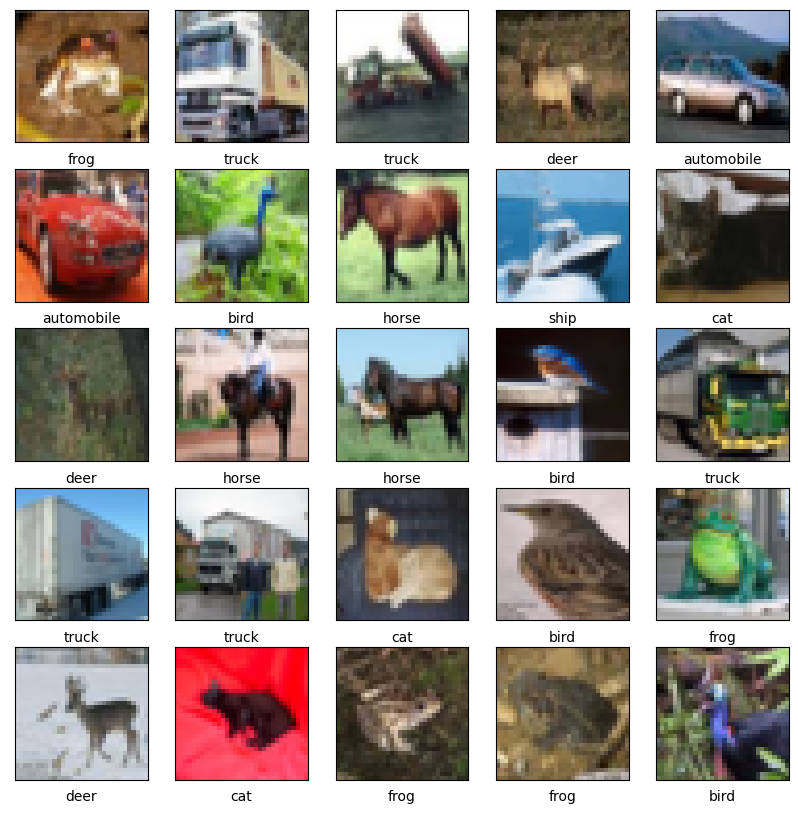

In [9]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

## Construção do Modelo

Construção de modelos é estudada nas Formações: <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a> e <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-de-ia">Formação Engenheiro de IA</a>.

www.deeplearningbook.com.br

![DSA](imagens/convnet.jpg)

In [10]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_dsa = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_dsa.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_dsa.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_dsa.add(layers.MaxPooling2D((2, 2)))

In [11]:
# Adicionar camadas de classificação
modelo_dsa.add(layers.Flatten())
modelo_dsa.add(layers.Dense(64, activation = 'relu'))
modelo_dsa.add(layers.Dense(10, activation = 'softmax'))

In [12]:
# Sumário do modelo
modelo_dsa.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [13]:
# Compilação do modelo
modelo_dsa.compile(optimizer = 'adam', 
                   loss = 'sparse_categorical_crossentropy', 
                   metrics = ['accuracy'])

In [14]:
%%time
history = modelo_dsa.fit(imagens_treino, 
                         labels_treino, 
                         epochs = 10, 
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5400 - accuracy: 0.4356 - val_loss: 1.2852 - val_accuracy: 0.5371
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1721 - accuracy: 0.5852 - val_loss: 1.0767 - val_accuracy: 0.6165
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0297 - accuracy: 0.6368 - val_loss: 1.0057 - val_accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9416 - accuracy: 0.6698 - val_loss: 0.9572 - val_accuracy: 0.6596
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8747 - accuracy: 0.6963 - val_loss: 0.9245 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8247 - accuracy: 0.7131 - val_loss: 0.8816 - val_accuracy: 0.6930
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7781 - accuracy: 0.7287 - val_loss: 0.8663 - val_accuracy:

## Avaliação do Modelo

In [15]:
# Avalia o modelo
erro_teste, acc_teste = modelo_dsa.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 1s - loss: 0.9138 - accuracy: 0.6906 - 511ms/epoch - 2ms/step


In [16]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.6905999779701233


## Deploy do Modelo

Deploy do modelo é estudado especialmente na <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-de-machine-learning">Formação Engenheiro de Machine Learning</a>.

In [17]:
# Carrega uma nova imagem
nova_imagem = Image.open("dados/nova_imagem.jpg")

In [18]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [19]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [20]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [21]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

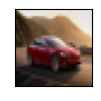

In [22]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [24]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0) 

In [25]:
# Previsões
previsoes = modelo_dsa.predict(nova_imagem_array)

1/1 [==============================] - 0s 66ms/step


In [26]:
print(previsoes)

[[5.2813679e-04 9.8091060e-01 8.0007994e-05 6.3578147e-05 6.3825473e-07
  5.1012753e-06 8.7833835e-04 9.5648500e-07 1.6988178e-04 1.7362770e-02]]


In [27]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [28]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: automobile


# Fim